In [94]:
import keras

In [95]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [96]:
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


In [97]:
import pandas as pd
df_traget = pd.DataFrame(train_target)
df_traget.value_counts().unique()

array([6000])

In [98]:
test_input.shape

(10000, 28, 28)

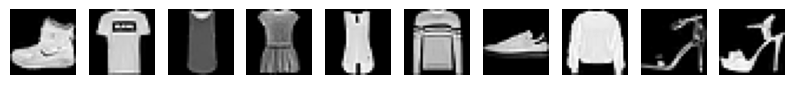

In [99]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray') # gray_r : 현재색 반전
    axs[i].axis('off') # 눈금 제거
plt.show()

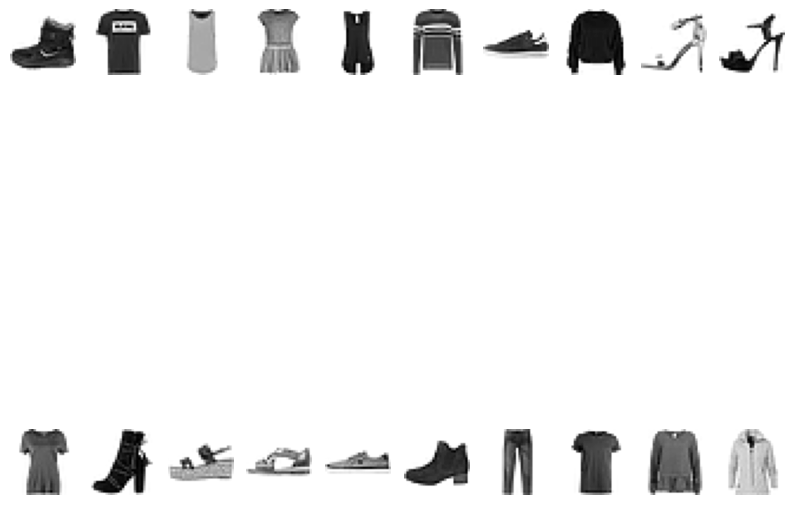

In [100]:
# 두 줄 출력
fig,axs = plt.subplots(2,10,figsize=(10,10))
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r') # gray_r : 현재색 반전
        axs[i,j].axis('off') # 눈금 제거
plt.show()

In [101]:
import numpy as np

np.unique(train_target, return_counts=True) # train_target 데이터의 유일한 값 추출, return_counts : 각각의 유일한 값의 개수

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [102]:
# 안에 있는 데이터를 0-1의 값으로 변경
train_scaled = train_input/255 # 784개 1개 묶음으로 변경
train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [103]:
train_scaled = train_scaled.reshape(-1,28*28)

In [104]:
# test_input - 784개의 그룹으로 묶어서
# 경사하강법을 사용해서 패션 아이템을 분류하시오.
test_scaled = test_input/255 # 784개 1개 묶음으로 변경
test_scaled.shape

(10000, 28, 28)

In [105]:
test_scaled = test_scaled.reshape(-1,28*28)

In [106]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

In [108]:
sc = SGDClassifier(loss='log_loss',max_iter=5,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
# scores = cross_validate(sc,train_scaled,train_target,n_jobs=-1)

# print(np.mean(scores['test_score']))
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8379666666666666
0.8109


In [ ]:
# 반복 300번
# partial_fit
# train_score = []
# test_score = []

# classes = np.unique(train_target)

In [ ]:
# for _ in range(0,50):
#     sc.partial_fit(train_scaled,train_target,classes=classes)
#     train_score.append(sc.score(train_scaled,train_target))
#     test_score.append(sc.score(test_scaled,test_target))

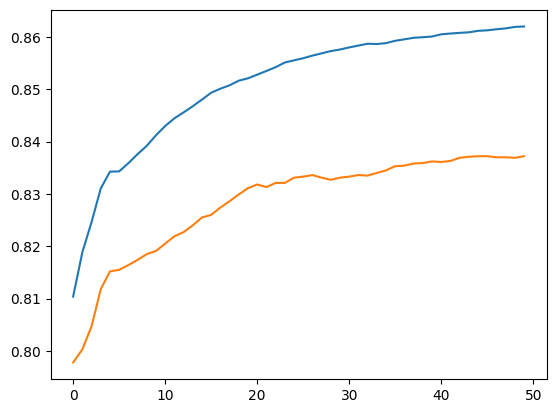

In [ ]:
# plt.plot(train_score)
# plt.plot(test_score)
# plt.show()